# Analiza eksperymentu A/B na podstawie logów

* Logi z serwisu zawierają dla każdej predykcji
  * id użytkownika
  * użyty model
  * id listingu
  * wartość predykcji
* Nie zawierają parametrów wywołania, ale można je odtworzyć na podstawie id listingu

TODO: ustalić na konsultacjach co i jak właściwie mamy tu liczyć,
bo nie ma w tym przypadku oczywistego sposobu jak określić który model jest lepszy
chyba że byśmy dysponowali średnimi ocenami dla tych listingów, które pojawią się w systemie po jakimś czasie

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

LOG_FILE = "../data/service.log"
BASE_MODEL_NAME = "RandomBaseModel"
NEW_MODEL_NAME = "LinearRegressionModel"

In [10]:
regex = re.compile(r"user (?P<user_id>[a-f0-9\-]+), given listing (?P<listing_id>\d+), using model (?P<model_name>\w+): (?P<prediction>[0-9.]+)")

with open(LOG_FILE) as f:
    logs = pd.DataFrame([
        re.search(regex, line.strip()).groupdict()
        for line in f
        if "PredictionService" in line
    ])

logs

,user_id,listing_id,model_name,prediction
0,617d32dc-5c87-4ac6-a89d-b991624c529b,1047164111839138424,RandomBaseModel,4.601391568632587
1,617d32dc-5c87-4ac6-a89d-b991624c529e,1047164111839138424,LinearRegressionModel,4.794981703732043
2,617d32dc-5c87-4ac6-a89d-b991624c529e,1047164111839138424,LinearRegressionModel,4.794981703732043
3,617d32dc-5c87-4ac6-a89d-b991624c529b,1047164111839138424,RandomBaseModel,4.757358068520032
4,617d32dc-5c87-4ac6-a89d-b991624c529b,1047164111839138424,RandomBaseModel,4.496196172096129
5,617d32dc-5c87-4ac6-a89d-b991624c529b,1047164111839138424,RandomBaseModel,4.974893206126437
6,617d32dc-5c87-4ac6-a89d-b991624c529b,1047164111839138424,RandomBaseModel,4.964942448130598
7,617d32dc-5c87-4ac6-a89d-b991624c529e,1047164111839138424,LinearRegressionModel,4.794981703732043
8,617d32dc-5c87-4ac6-a89d-b991624c529e,1047164111839138424,LinearRegressionModel,4.794981703732043


In [11]:
logs_a = logs[logs["model_name"] == BASE_MODEL_NAME]
logs_b = logs[logs["model_name"] == NEW_MODEL_NAME]

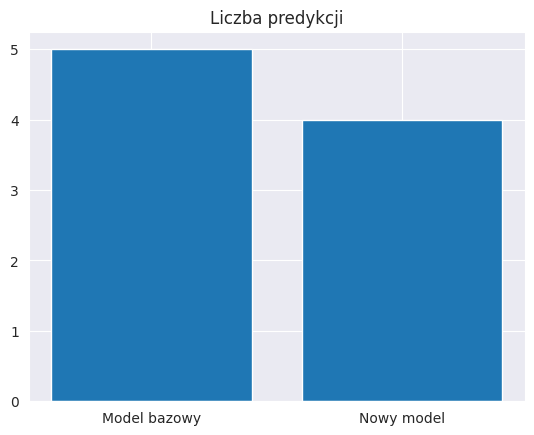

In [14]:
plt.bar(x=["Model bazowy", "Nowy model"], height=[len(logs_a), len(logs_b)])
plt.title("Liczba predykcji")
plt.show()

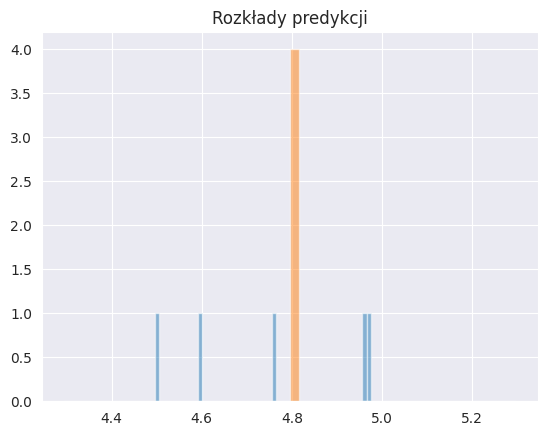

In [15]:
plt.hist(logs_a["prediction"].astype(float), bins=50, alpha=0.5, label="Model bazowy")
plt.hist(logs_b["prediction"].astype(float), bins=50, alpha=0.5, label="Nowy model")
plt.title("Rozkłady predykcji")
plt.show()